In [1]:
import copy

from matplotlib import pyplot as plt

from experiments.plots.util import storage_info, total_storage_consumption, use_case_ids, \
    create_pie_chart_sizes_and_labels

In [2]:
BASELINE_MOBILENET_SERVER_LOG = '/Users/nils/Desktop/tmp/flow-test/server/experiments/evaluation_flow/out.txt'
BASELINE_GOOGLENET_SERVER_LOG = '/Users/nils/Desktop/tmp/flow-test/server/experiments/evaluation_flow/out.txt'
BASELINE_RESNET18_SERVER_LOG = '/Users/nils/Desktop/tmp/flow-test/server/experiments/evaluation_flow/out.txt'
BASELINE_RESNET50_SERVER_LOG = '/Users/nils/Desktop/tmp/flow-test/server/experiments/evaluation_flow/out.txt'
BASELINE_RESNET152_SERVER_LOG = '/Users/nils/Desktop/tmp/flow-test/server/experiments/evaluation_flow/out.txt'

MODEL_NAMES = ['mobilenet', 'googlenet', 'resnet18', 'resnet50', 'resnet152']
BASELINE_SERVER_LOGS = [BASELINE_MOBILENET_SERVER_LOG, BASELINE_GOOGLENET_SERVER_LOG, BASELINE_RESNET18_SERVER_LOG,
                        BASELINE_RESNET50_SERVER_LOG, BASELINE_RESNET152_SERVER_LOG]

In [3]:
use_case_id_dicts = [use_case_ids(log_file) for log_file in BASELINE_SERVER_LOGS]

print(use_case_id_dicts)

[{'U_1': '60be29e98536aacf9be2727c', 'U_3_1_1': '60be2a0025ab8997757a09ba', 'U_3_1_2': '60be2a0225ab8997757a09c9', 'U_2': '60be2a048536aacf9be27281', 'U_3_2_1': '60be2a0925ab8997757a09d8', 'U_3_2_2': '60be2a0b25ab8997757a09e7'}, {'U_1': '60be29e98536aacf9be2727c', 'U_3_1_1': '60be2a0025ab8997757a09ba', 'U_3_1_2': '60be2a0225ab8997757a09c9', 'U_2': '60be2a048536aacf9be27281', 'U_3_2_1': '60be2a0925ab8997757a09d8', 'U_3_2_2': '60be2a0b25ab8997757a09e7'}, {'U_1': '60be29e98536aacf9be2727c', 'U_3_1_1': '60be2a0025ab8997757a09ba', 'U_3_1_2': '60be2a0225ab8997757a09c9', 'U_2': '60be2a048536aacf9be27281', 'U_3_2_1': '60be2a0925ab8997757a09d8', 'U_3_2_2': '60be2a0b25ab8997757a09e7'}, {'U_1': '60be29e98536aacf9be2727c', 'U_3_1_1': '60be2a0025ab8997757a09ba', 'U_3_1_2': '60be2a0225ab8997757a09c9', 'U_2': '60be2a048536aacf9be27281', 'U_3_2_1': '60be2a0925ab8997757a09d8', 'U_3_2_2': '60be2a0b25ab8997757a09e7'}, {'U_1': '60be29e98536aacf9be2727c', 'U_3_1_1': '60be2a0025ab8997757a09ba', 'U_3_1_2': '

In [4]:
baseline_storage_infos = []
for id_dict, f in zip(use_case_id_dicts, BASELINE_SERVER_LOGS):
    storage_info_dict = {}
    for k, v in id_dict.items():
        storage_info_dict[k] = storage_info(f, v)
    baseline_storage_infos.append(storage_info_dict)

print(baseline_storage_infos)


[{'U_1': {'metadata_size': 69827, 'recover_info': {'metadata_size': 223, 'environment': {'metadata_size': 3291}, 'model_code': 6959, 'parameters': 14266675}}, 'U_3_1_1': {'metadata_size': 69870, 'recover_info': {'metadata_size': 176, 'environment': {'metadata_size': 3291}, 'train_info': {'metadata_size': 231, 'train_service': {'metadata_size': 270, 'state_dict': {'data': {'metadata_size': 219, 'code_file': 3447}, 'dataloader': {'metadata_size': 268}, 'optimizer': {'metadata_size': 287, 'code_file': 374, 'state_file': 879}}}, 'wrapper_code': 2820}, 'dataset': {'metadata_size': 99, 'raw_data': 22336767}}}, 'U_3_1_2': {'metadata_size': 69870, 'recover_info': {'metadata_size': 176, 'environment': {'metadata_size': 3291}, 'train_info': {'metadata_size': 231, 'train_service': {'metadata_size': 270, 'state_dict': {'data': {'metadata_size': 219, 'code_file': 3447}, 'dataloader': {'metadata_size': 268}, 'optimizer': {'metadata_size': 287, 'code_file': 374, 'state_file': 879}}}, 'wrapper_code': 

In [5]:
total_storage_consumptions = copy.deepcopy(baseline_storage_infos)
for st_info in total_storage_consumptions:
    for k, v in st_info.items():
        st_info[k] = total_storage_consumption(v)

print(total_storage_consumptions)

[{'U_1': 14346975, 'U_3_1_1': 22418998, 'U_3_1_2': 22418998, 'U_2': 11863384, 'U_3_2_1': 22418998, 'U_3_2_2': 22418998}, {'U_1': 14346975, 'U_3_1_1': 22418998, 'U_3_1_2': 22418998, 'U_2': 11863384, 'U_3_2_1': 22418998, 'U_3_2_2': 22418998}, {'U_1': 14346975, 'U_3_1_1': 22418998, 'U_3_1_2': 22418998, 'U_2': 11863384, 'U_3_2_1': 22418998, 'U_3_2_2': 22418998}, {'U_1': 14346975, 'U_3_1_1': 22418998, 'U_3_1_2': 22418998, 'U_2': 11863384, 'U_3_2_1': 22418998, 'U_3_2_2': 22418998}, {'U_1': 14346975, 'U_3_1_1': 22418998, 'U_3_1_2': 22418998, 'U_2': 11863384, 'U_3_2_1': 22418998, 'U_3_2_2': 22418998}]


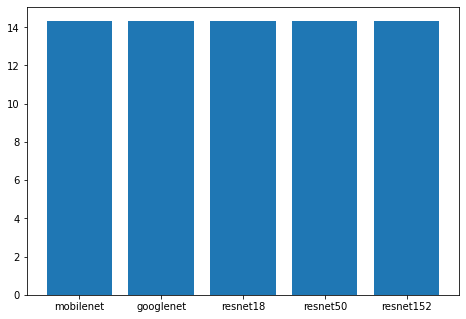

In [6]:
u1_sizes = []
for st_dict in total_storage_consumptions:
    u1_sizes.append(st_dict['U_1'])

# for plot convert to MB
mbs = [c * 10 ** -6 for c in u1_sizes]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(MODEL_NAMES, mbs)
plt.show()


In [7]:
def pie_chart(labels, sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()


In [8]:
def recursive_pie_chart(root_storage_info):
    l, s = create_pie_chart_sizes_and_labels(root_storage_info)
    pie_chart(l, s)
    for k, v in root_storage_info.items():
        if isinstance(v, dict):
            recursive_pie_chart(v)

{'metadata_size': 69827, 'recover_info': {'metadata_size': 223, 'environment': {'metadata_size': 3291}, 'model_code': 6959, 'parameters': 14266675}}


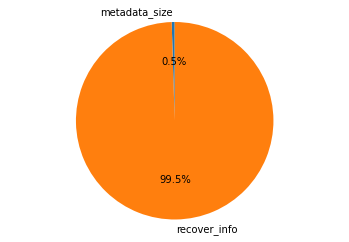

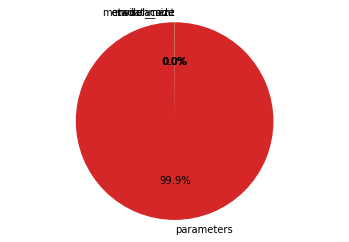

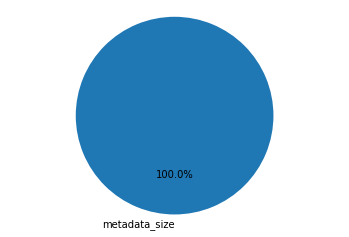

In [9]:
example_storage_info = baseline_storage_infos[0]['U_1']
print(example_storage_info)
recursive_pie_chart(example_storage_info)